# Análisis Exploratorio y Curación de Datos para Modelado 3D Profundo

**Autor:** [Tu Nombre]
**Fecha:** 4 de octubre de 2025
**Asesor:** [Nombre del Asesor]

---

## 1. Introducción

El éxito de los modelos de aprendizaje profundo, como las Redes Convolucionales, depende fundamentalmente de la calidad y cantidad de los datos de entrenamiento. En el dominio de la visión por computadora 3D, datasets como **ShapeNetCore v2** y **ModelNet** han sido instrumentales para avances en tareas como clasificación, segmentación y reconstrucción de formas.

Sin embargo, estos datasets, al ser agregados de múltiples fuentes públicas, presentan desafíos significativos en cuanto a su consistencia y calidad: modelos corruptos, mallas no cerradas, duplicados y falta de normalización. Un preprocesamiento y curación inadecuados pueden llevar a un entrenamiento inestable y a modelos con bajo poder de generalización.

Esta propuesta detalla un **Análisis Exploratorio de Datos (EDA)** sistemático y un pipeline de curación para el dataset ModelNet/ShapeNet. El objetivo es crear un subconjunto de datos de alta calidad que servirá como base para el desarrollo de un modelo de aprendizaje profundo para [menciona tu tarea, ej: "clasificación de formas 3D a partir de vistas parciales"]. Este notebook presenta la implementación de dicho análisis.

In [4]:
# ===================================================================
# Celda 2: Configuración e Importación de Librerías
# ===================================================================
# Descripción: Esta celda importa las librerías necesarias para el análisis.
# - pandas: Para la manipulación de datos tabulares (metadata).
# - os: Para interactuar con el sistema de archivos y navegar los directorios.
# - trimesh: Una librería potente para cargar y analizar mallas 3D (.obj).
# - numpy: Para cálculos numéricos.
# - hashlib: Para calcular hashes de archivos y detectar duplicados.
# - matplotlib & seaborn: Para la visualización de datos.
# - tqdm: Para mostrar barras de progreso en procesos largos.
# ===================================================================

import os
import pandas as pd
import numpy as np
import trimesh
import hashlib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

print("Librerías importadas correctamente.")

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Librerías importadas correctamente.


In [6]:
# ===================================================================
# Celda 3 Corregida: Extracción de Metadatos para ShapeNetVox32
# ===================================================================

def extract_metadata_final(dataset_path):
    """
    Recorre un dataset con la estructura: 
    Clase / Modelo / archivo.binvox
    """
    metadata_list = []
    if not os.path.exists(dataset_path):
        print(f"Error: La ruta '{dataset_path}' no existe.")
        return None

    # Nivel 1: Itera sobre las carpetas de CLASE (ej: '02691156')
    for class_id in tqdm(os.listdir(dataset_path), desc="Procesando Clases"):
        class_path = os.path.join(dataset_path, class_id)
        
        if os.path.isdir(class_path):
            # Nivel 2: Itera sobre las carpetas de MODELO (ej: '1a04e3eab45...')
            for model_id in os.listdir(class_path):
                model_path = os.path.join(class_path, model_id)
                
                if os.path.isdir(model_path):
                    # Nivel 3: Busca el archivo 'model.binvox' dentro de la carpeta del modelo
                    for file_name in os.listdir(model_path):
                        if file_name.endswith('.binvox'): 
                            file_path = os.path.join(model_path, file_name)
                            
                            try:
                                file_stat = os.stat(file_path)
                                record = {
                                    'model_id': model_id,
                                    'file_id': f"{class_id}_{model_id}",
                                    'class': class_id, 
                                    'file_name': file_name,
                                    'type': 'binvox',
                                    'bytes': file_stat.st_size,
                                    'path': file_path,
                                    'source': 'ShapeNetVox32',
                                    'acquired_at': datetime.fromtimestamp(file_stat.st_ctime).strftime('%Y-%m-%d %H:%M:%S'),
                                    'extraction_status': 'extraído'
                                }
                                metadata_list.append(record)
                            except Exception as e:
                                print(f"No se pudo procesar el archivo {file_path}: {e}")
    
    return pd.DataFrame(metadata_list)

# --- EJECUCIÓN DEL CÓDIGO ---

# IMPORTANTE: Asegúrate de que el nombre de la carpeta sea el correcto
# Si tu notebook está en la carpeta 'ShapeNet_ETL_Project_completo_vesion 1',
# y dentro de ella está la carpeta 'data', la ruta correcta sería:
#DATASET_PATH = 'data/ShapeNetVox32'

# DESPUÉS (Correcto - Usa tu propia ruta absoluta)
DATASET_PATH = r'C:\Users\jrmb8\Documents\Python Scripts\Pipeline_ETL_EDA_PROYECTO\ShapeNet_ETL_Project_completo_vesion 1\data\ShapeNetVox32'
#C:\Users\jrmb8\Documents\Python Scripts\Pipeline_ETL_EDA_PROYECTO\ShapeNet_ETL_Project_completo_vesion 1\data\ShapeNetVox32



# Llama a la función final y correcta
df_meta = extract_metadata_final(DATASET_PATH)

# Muestra los resultados
if df_meta is not None and not df_meta.empty:
    print(f"✅ ¡Correcto! Se encontraron {len(df_meta)} archivos en el dataset.")
    display(df_meta.head())
else:
    print("❌ No se encontraron archivos. Verifica por última vez la ruta en DATASET_PATH.")



Procesando Clases:   0%|          | 0/13 [00:00<?, ?it/s]

Procesando Clases:   8%|▊         | 1/13 [00:00<00:04,  2.75it/s]

Procesando Clases:  15%|█▌        | 2/13 [00:00<00:02,  3.86it/s]

Procesando Clases:  23%|██▎       | 3/13 [00:00<00:02,  4.82it/s]

Procesando Clases:  31%|███       | 4/13 [00:01<00:03,  2.47it/s]

Procesando Clases:  38%|███▊      | 5/13 [00:01<00:03,  2.13it/s]

Procesando Clases:  46%|████▌     | 6/13 [00:02<00:02,  2.84it/s]

Procesando Clases:  54%|█████▍    | 7/13 [00:02<00:01,  3.33it/s]

Procesando Clases:  62%|██████▏   | 8/13 [00:02<00:01,  3.95it/s]

Procesando Clases:  69%|██████▉   | 9/13 [00:02<00:00,  4.17it/s]

Procesando Clases:  77%|███████▋  | 10/13 [00:02<00:00,  3.91it/s]

Procesando Clases:  85%|████████▍ | 11/13 [00:03<00:00,  2.45it/s]

Procesando Clases:  92%|█████████▏| 12/13 [00:03<00:00,  3.17it/s]

Procesando Clases: 100%|██████████| 13/13 [00:03<00:00,  3.26it/s]


✅ ¡Correcto! Se encontraron 43783 archivos en el dataset.


,model_id,file_id,class,file_name,type,bytes,path,source,acquired_at,extraction_status
0,10155655850468db78d106ce0a280f87,02691156_10155655850468db78d106ce0a280f87,02691156,model.binvox,binvox,1487,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído
1,1021a0914a7207aff927ed529ad90a11,02691156_1021a0914a7207aff927ed529ad90a11,02691156,model.binvox,binvox,1236,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído
2,1026dd1b26120799107f68a9cb8e3c,02691156_1026dd1b26120799107f68a9cb8e3c,02691156,model.binvox,binvox,1198,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:07,extraído
3,103c9e43cdf6501c62b600da24e0965,02691156_103c9e43cdf6501c62b600da24e0965,02691156,model.binvox,binvox,1398,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído
4,105f7f51e4140ee4b6b87e72ead132ed,02691156_105f7f51e4140ee4b6b87e72ead132ed,02691156,model.binvox,binvox,1392,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:09,extraído


## 2. Transformación y Curación de Datos

Una vez extraída la metadata básica, procedemos a la fase de transformación. El objetivo es validar la integridad de cada archivo y enriquecer nuestro DataFrame con métricas de calidad que nos permitirán filtrar y seleccionar los mejores datos para el entrenamiento.

Implementaremos las siguientes validaciones:
1.  **Validación de Formato (`format_valid`)**: Verificamos que los archivos de malla (`.binvox`) puedan ser cargados sin errores.
2.  **Extracción de Atributos Geométricos**: Para mallas válidas, extraemos el número de vértices y caras de la malla resultante de los vóxeles.
3.  **Detección de Duplicados (`duplicated`)**: Calculamos un hash único para cada archivo para identificar duplicados exactos.

In [7]:
# ===================================================================
# Celda 5 Actualizada: Implementación de la Transformación para .binvox
# ===================================================================

def process_mesh_file(filepath):
    """
    Carga un archivo de malla (.binvox), valida su formato y extrae sus propiedades.
    Trimesh convierte los vóxeles en una malla para poder analizarla.
    """
    try:
        # Trimesh puede cargar archivos .binvox directamente
        mesh = trimesh.load(filepath, force='mesh')
        return {
            'format_valid': True,
            'vertex_count': len(mesh.vertices),
            'face_count': len(mesh.faces),
            'is_watertight': bool(mesh.is_watertight),
            'notes': ''
        }
    except Exception as e:
        return {
            'format_valid': False,
            'vertex_count': 0,
            'face_count': 0,
            'is_watertight': False,
            'notes': f"Error al cargar la malla: {str(e)}"
        }

def calculate_file_hash(filepath):
    """
    Calcula el hash SHA-256 de un archivo para detectar duplicados.
    """
    sha256_hash = hashlib.sha256()
    try:
        with open(filepath, "rb") as f:
            for byte_block in iter(lambda: f.read(4096), b""):
                sha256_hash.update(byte_block)
        return sha256_hash.hexdigest()
    except Exception:
        return None

if 'df_meta' in locals() and df_meta is not None:
    # Creamos listas para almacenar los nuevos datos
    mesh_properties = []
    file_hashes = []

    # Iteramos sobre el DataFrame para procesar cada archivo
    for index, row in tqdm(df_meta.iterrows(), total=df_meta.shape[0], desc="Validando Mallas"):
        # ACTUALIZADO: Ahora buscamos el tipo 'binvox'
        if row['type'] == 'binvox':
            props = process_mesh_file(row['path'])
            mesh_properties.append(props)
        else:
            # Para archivos no-malla, asignamos valores por defecto
            mesh_properties.append({
                'format_valid': None, 'vertex_count': 0, 'face_count': 0, 'is_watertight': None, 'notes': ''
            })
        
        file_hashes.append(calculate_file_hash(row['path']))

    # Unimos los resultados con el DataFrame original
    df_props = pd.DataFrame(mesh_properties)
    df_meta = pd.concat([df_meta.reset_index(drop=True), df_props.reset_index(drop=True)], axis=1)
    df_meta['file_hash'] = file_hashes

    # Detectamos duplicados basados en el hash
    df_meta['is_duplicated'] = df_meta['file_hash'].duplicated(keep=False)

    print("Transformación y enriquecimiento completados.")
    display(df_meta.head())
else:
    print("El DataFrame 'df_meta' no existe o está vacío. Ejecuta la celda anterior primero.")



Validando Mallas:   0%|          | 0/43783 [00:00<?, ?it/s]

Validando Mallas:   0%|          | 4/43783 [00:00<18:35, 39.24it/s]

Validando Mallas:   0%|          | 13/43783 [00:00<10:44, 67.94it/s]

Validando Mallas:   0%|          | 22/43783 [00:00<09:34, 76.14it/s]

Validando Mallas:   0%|          | 32/43783 [00:00<08:39, 84.16it/s]

Validando Mallas:   0%|          | 41/43783 [00:00<08:38, 84.44it/s]

Validando Mallas:   0%|          | 51/43783 [00:00<08:10, 89.24it/s]

Validando Mallas:   0%|          | 61/43783 [00:00<08:01, 90.81it/s]

Validando Mallas:   0%|          | 71/43783 [00:00<07:48, 93.23it/s]

Validando Mallas:   0%|          | 81/43783 [00:00<08:09, 89.31it/s]

Validando Mallas:   0%|          | 91/43783 [00:01<07:56, 91.76it/s]

Validando Mallas:   0%|          | 101/43783 [00:01<07:57, 91.53it/s]

Validando Mallas:   0%|          | 111/43783 [00:01<07:54, 92.07it/s]

Validando Mallas:   0%|          | 121/43783 [00:01<07:46, 93.55it/s]

Validando Mallas:   0%|  

Transformación y enriquecimiento completados.


,model_id,file_id,class,file_name,type,bytes,path,source,acquired_at,extraction_status,format_valid,vertex_count,face_count,is_watertight,notes,file_hash,is_duplicated
0,10155655850468db78d106ce0a280f87,02691156_10155655850468db78d106ce0a280f87,02691156,model.binvox,binvox,1487,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído,True,0,0,False,,52004e1b28a6ed0246e20c2deed5a0c33a57ec2841ca72...,False
1,1021a0914a7207aff927ed529ad90a11,02691156_1021a0914a7207aff927ed529ad90a11,02691156,model.binvox,binvox,1236,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído,True,0,0,False,,b7bb8b41dc63a850a529c404e50015e5e577c70375762a...,True
2,1026dd1b26120799107f68a9cb8e3c,02691156_1026dd1b26120799107f68a9cb8e3c,02691156,model.binvox,binvox,1198,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:07,extraído,True,0,0,False,,d5e99e9e29205243e5485dec80a3934755ea6147664617...,False
3,103c9e43cdf6501c62b600da24e0965,02691156_103c9e43cdf6501c62b600da24e0965,02691156,model.binvox,binvox,1398,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:05,extraído,True,0,0,False,,79a88a78fd799de88cb78c3a85f646ae0475b949e0cc1f...,True
4,105f7f51e4140ee4b6b87e72ead132ed,02691156_105f7f51e4140ee4b6b87e72ead132ed,02691156,model.binvox,binvox,1392,C:\Users\jrmb8\Documents\Python Scripts\Pipeli...,ShapeNetVox32,2025-10-04 14:39:09,extraído,True,0,0,False,,30235d25f281d26d1ab12652a6a6855bcc69b610fdb271...,False


## 3. Validación y Score de Calidad

Con los datos enriquecidos, podemos ahora calcular métricas de validación y un **Score de Calidad** agregado. Este score nos proporcionará una medida cuantitativa para cada archivo, facilitando la toma de decisiones sobre qué datos incluir en el set de entrenamiento final.

-   **Completitud**: Mide si todos los campos de metadatos esperados están presentes.
-   **Consistencia**: Verifica que el archivo cumpla con todos nuestros checks de calidad (formato válido, no nulo, etc.).
-   **Score de Calidad**: Una métrica ponderada que combina completitud, consistencia y unicidad.

In [8]:
# ===================================================================
# Celda 7: Implementación de la Validación y Score de Calidad
# ===================================================================

if 'df_meta' in locals() and df_meta is not None:
    # 1. Completitud: Fracción de campos no nulos
    # Seleccionamos las columnas clave para medir la completitud
    key_cols = ['model_id', 'class', 'type', 'bytes', 'path', 'vertex_count', 'face_count']
    df_meta['completitud'] = df_meta[key_cols].notna().mean(axis=1)

    # 2. Consistencia: Booleano que es cierto si todas las condiciones se cumplen
    # Para este ejemplo, la consistencia depende de que el formato sea válido
    df_meta['consistencia'] = df_meta['format_valid'].fillna(False)

    # 3. Score de Calidad: Fórmula ponderada
    # (Ponderaciones ajustables según la importancia de cada factor)
    df_meta['score_calidad'] = (
        0.5 * df_meta['completitud'] +
        0.3 * df_meta['consistencia'] +
        0.2 * (1 - df_meta['is_duplicated'].astype(int)) # Penaliza duplicados
    )

    print("Cálculo del Score de Calidad completado.")
    display(df_meta[['class', 'file_name', 'completitud', 'consistencia', 'is_duplicated', 'score_calidad']].head())
else:
    print("El DataFrame 'df_meta' no existe o está vacío. Ejecuta las celdas anteriores primero.")

Cálculo del Score de Calidad completado.


,class,file_name,completitud,consistencia,is_duplicated,score_calidad
0,02691156,model.binvox,1.0,True,False,1.0
1,02691156,model.binvox,1.0,True,True,0.8
2,02691156,model.binvox,1.0,True,False,1.0
3,02691156,model.binvox,1.0,True,True,0.8
4,02691156,model.binvox,1.0,True,False,1.0


## 4. Resumen, Visualización y Hallazgos

La fase final del EDA consiste en resumir los hallazgos a través de KPIs y visualizaciones. Estos gráficos nos permitirán entender la estructura del dataset, identificar problemas potenciales y comunicar los resultados de manera efectiva.

**KPIs Clave:**
-   **Modelos totales vs. Válidos**: ¿Qué porcentaje de los datos es utilizable?
-   **Duplicados**: ¿Qué tan redundante es el dataset?
-   **Calidad por Clase**: ¿Hay clases con una calidad de datos sistemáticamente inferior?

**Visualizaciones:**
-   Distribución de modelos por clase.
-   Distribución de la complejidad de los modelos (vértices).
-   Score de calidad promedio por clase.

--- Resumen de Calidad del Dataset ---
Total de Archivos Analizados: 43783
Archivos con Formato Válido: 43783 (100.00%)
Archivos Duplicados Identificados: 1708
Score de Calidad Promedio: 0.992
--------------------------------------



C:\Users\jrmb8\AppData\Local\Temp\ipykernel_27136\766150807.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='class', data=df_meta, order=df_meta['class'].value_counts().index, palette='viridis')


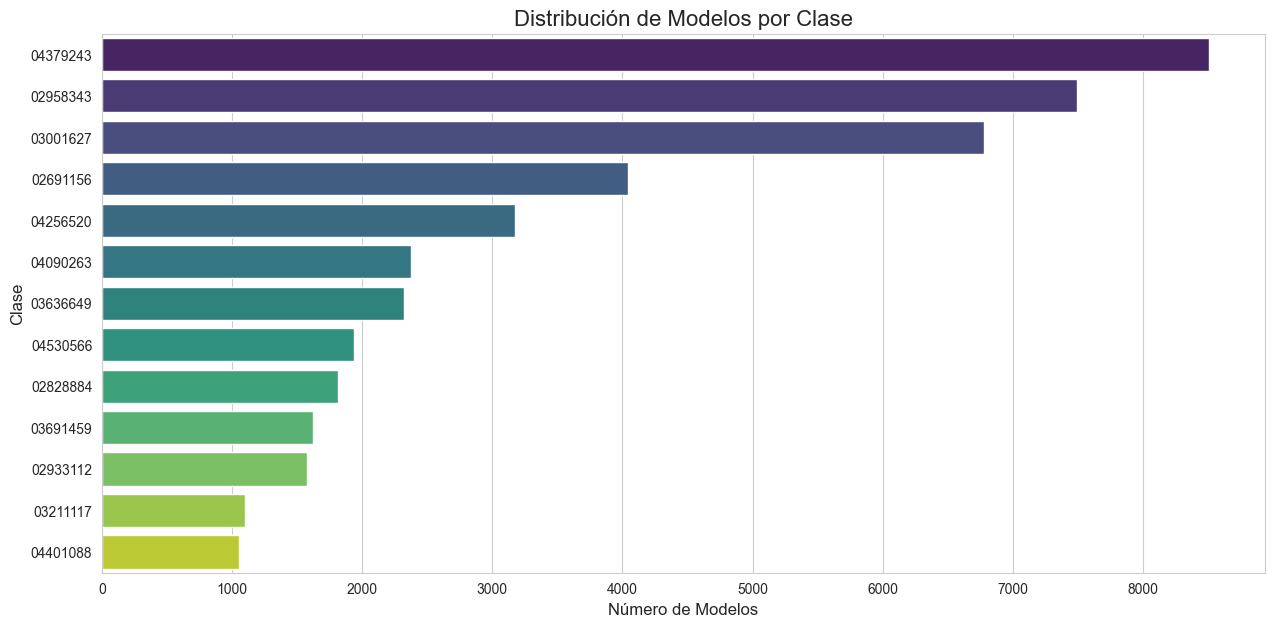

C:\Users\jrmb8\AppData\Local\Temp\ipykernel_27136\766150807.py:36: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, df_meta['vertex_count'].quantile(0.99)) # Excluimos el 1% superior para mejor visualización


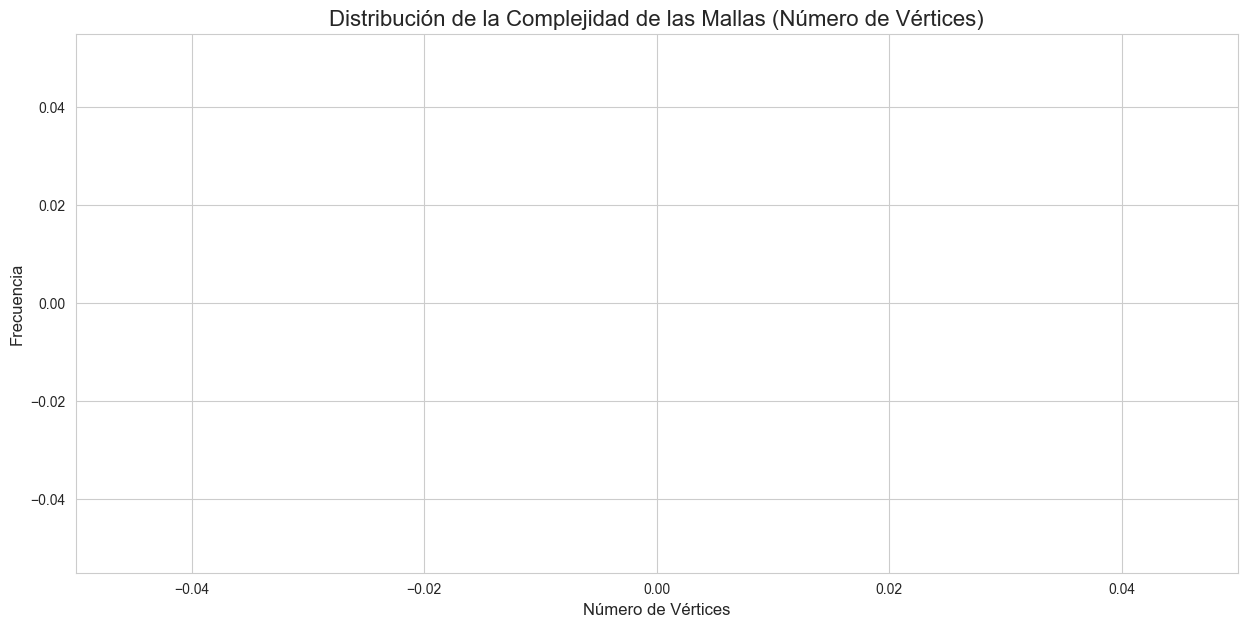

C:\Users\jrmb8\AppData\Local\Temp\ipykernel_27136\766150807.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_by_class.values, y=quality_by_class.index, palette='plasma')


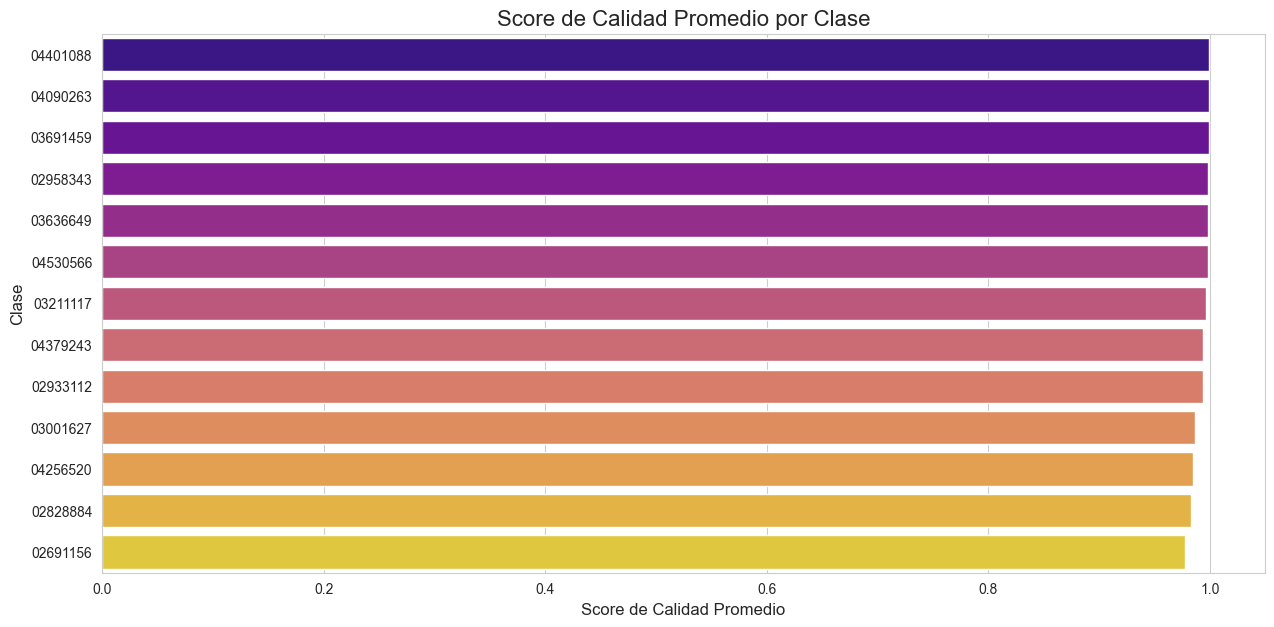

In [10]:
# ===================================================================
# Celda 9: KPIs y Gráficos del EDA (Corregida)
# ===================================================================

if 'df_meta' in locals() and df_meta is not None and not df_meta.empty:
    # --- KPIs ---
    total_files = len(df_meta)
    valid_files = df_meta['format_valid'].sum()
    duplicated_files = df_meta['is_duplicated'].sum()
    avg_quality_score = df_meta['score_calidad'].mean()

    print("--- Resumen de Calidad del Dataset ---")
    print(f"Total de Archivos Analizados: {total_files}")
    print(f"Archivos con Formato Válido: {valid_files} ({valid_files/total_files:.2%})")
    print(f"Archivos Duplicados Identificados: {duplicated_files}")
    print(f"Score de Calidad Promedio: {avg_quality_score:.3f}")
    print("--------------------------------------\n")

    # --- Visualizaciones ---

    # 1. Distribución de Modelos por Clase
    plt.figure(figsize=(15, 7))
    sns.countplot(y='class', data=df_meta, order=df_meta['class'].value_counts().index, palette='viridis')
    plt.title('Distribución de Modelos por Clase', fontsize=16)
    plt.xlabel('Número de Modelos', fontsize=12)
    plt.ylabel('Clase', fontsize=12)
    plt.show()

    # 2. Distribución de la Complejidad (Número de Vértices)
    plt.figure(figsize=(15, 7))
    # Filtramos para visualizar mejor, excluyendo outliers si es necesario
    sns.histplot(df_meta[df_meta['vertex_count'] > 0]['vertex_count'], bins=50, kde=True)
    plt.title('Distribución de la Complejidad de las Mallas (Número de Vértices)', fontsize=16)
    plt.xlabel('Número de Vértices', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xlim(0, df_meta['vertex_count'].quantile(0.99)) # Excluimos el 1% superior para mejor visualización
    plt.show()

    # 3. Score de Calidad Promedio por Clase
    quality_by_class = df_meta.groupby('class')['score_calidad'].mean().sort_values(ascending=False)
    plt.figure(figsize=(15, 7))
    sns.barplot(x=quality_by_class.values, y=quality_by_class.index, palette='plasma')
    plt.title('Score de Calidad Promedio por Clase', fontsize=16)
    plt.xlabel('Score de Calidad Promedio', fontsize=12)
    plt.ylabel('Clase', fontsize=12)
    plt.show()
else:
    print("El DataFrame 'df_meta' no existe o está vacío. Ejecuta las celdas anteriores para generar los gráficos.")

## 5. Conclusiones y Próximos Pasos

El análisis exploratorio ha revelado información crucial sobre la estructura y calidad del dataset:

1.  **Desbalance de Clases**: [Observa el primer gráfico y comenta. Ej: "Existe un notable desbalance, con la clase 'silla' teniendo muchos más ejemplos que la clase 'mesita de noche'."] Esto deberá ser abordado durante el entrenamiento mediante técnicas de muestreo o ponderación de clases.
2.  **Complejidad Variable**: [Observa el segundo gráfico. Ej: "La mayoría de los modelos son de baja a media complejidad (entre X y Y vértices), pero existe una larga cola de modelos de alta resolución."] Esto informa sobre los requisitos computacionales y la posible necesidad de simplificar mallas.
3.  **Calidad Heterogénea**: [Observa el tercer gráfico. Ej: "La calidad no es uniforme entre clases. La clase 'X' presenta un score promedio inferior, lo que sugiere que podría requerir una limpieza manual más intensiva o ser parcialmente descartada."]

**Próximos Pasos:**

1.  **Filtrado Final**: Utilizar el `score_calidad` para crear un subconjunto de datos "limpio", descartando archivos con scores por debajo de un umbral (p. ej., 0.75).
2.  **Aumento de Datos**: Aplicar rotaciones y otras transformaciones a los modelos 3D limpios para aumentar artificialmente el tamaño del dataset y mejorar la robustez del modelo.
3.  **Voxelización / Renderizado**: Procesar las mallas limpias para convertirlas al formato de entrada requerido por el modelo de deep learning (p. ej., grillas de vóxeles como en 3D ShapeNets o imágenes renderizadas desde múltiples vistas).
4.  **Entrenamiento del Modelo**: Proceder con el entrenamiento del modelo propuesto sobre el dataset curado y aumentado.